# Task 1 - Prediction using Supervised Machine Learning
## Simple Linear Regression
In this task we are going to predict the percentage of an student's marks based on the no. of hours they study. This is a Simple Linear Regression as it involves only two variable

### **Author: Moksh Jaiswal**

In [15]:
# Importing the basic required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported Successfully")

Data imported Successfully


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isnull == True

False

Let's draw histogram for both the variables to see if there is any outlier in the data.

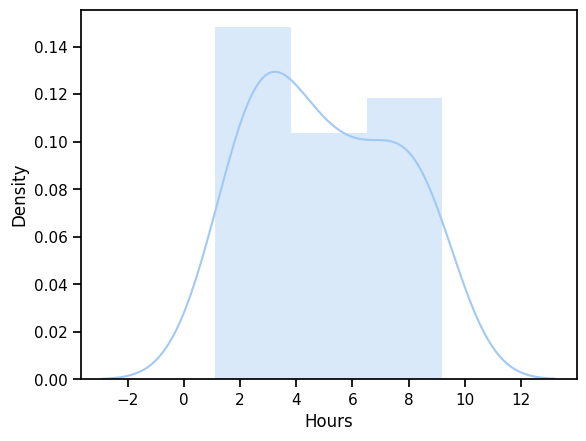

In [16]:
sns.distplot(data['Hours'])
sns.set_context('notebook')
sns.set_palette('pastel')

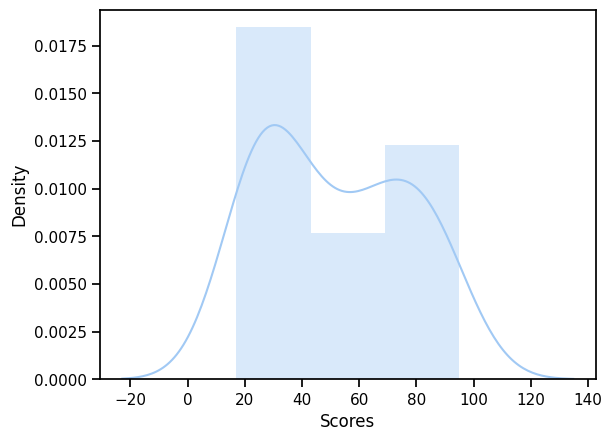

In [17]:
sns.distplot(data['Scores'])
sns.set_palette('pastel')

Now, let's plot a 2D Scatter plot to understand the relationship between our variables.

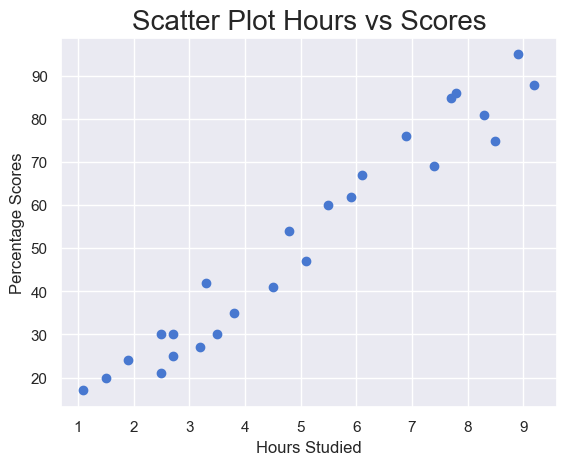

In [12]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
sns.set_palette('muted')
plt.scatter(data['Hours'], data['Scores'])
plt.title('Scatter Plot Hours vs Scores',size=20)
plt.xlabel('Hours Studied',size=12)
plt.ylabel('Percentage Scores',size=12)
plt.show()

**The above graph clearly suggests that there is a positive linear correlation between the variables. We can even check their relation using the bel**

In [13]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Data Preparing**
The next step is to distribute the data into attribute(inputs) and labels(output)

In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

After obtainig the attributes and labels we now have to split them into training dataset and testing dataset.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Training the Algorithm**
Our next step includes to train the algorithm using the training and testing dataset 

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Complete!")

Training Complete!


Text(0, 0.5, 'Scores')

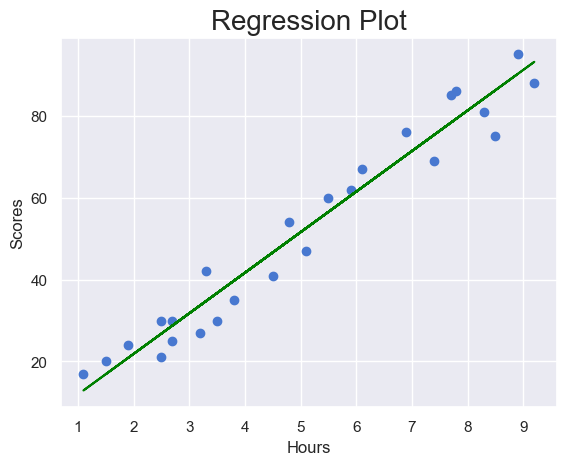

In [16]:
m = regressor.coef_
c = regressor.intercept_
line = m*X + c
plt.scatter(X, y)
plt.plot(X, line, color = 'green')
plt.title('Regression Plot', size = 20)
plt.xlabel('Hours',size=12)
plt.ylabel('Scores',size=12)

### **Making Predictions**
Now that we have trained our data, we can now make the predictions

In [17]:
print(X_test) # Testing data - In hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing actual values with Predicted values
compare_values = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
compare_values

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**
This is our final step where we want to evaluate the performance of the model. When dealing with a situation where outliers or large prediction errors should be treated with caution, MAE might be more appropriate. If you want to aggressively penalize prediction errors, MSE might be more suitable. Additionally, other metrics, like Root Mean Squared Error (RMSE), which is the square root of MSE, can also be considered when you want errors to be in the same units as the dependent variable.







In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)
print("R-Squared : ",r2)

Mean Squared Error :  21.598769307217406
Mean Absolute Error :  4.183859899002975
R-Squared :  0.9454906892105355


### **Testing our own hypothesis**

**What will be the predicted score if a student studies for 9.25 hrs/day?**

In [23]:
hours = [9.25]
predict = regressor.predict([hours])
print("Number of hours = {} ". format(hours))
print("Number of hours = {} ".format(hours))
print("Predicted value = {} ".format(predict[0]))

Number of hours = [9.25] 
Number of hours = [9.25] 
Predicted value = 93.69173248737535 


# Thank You